In [23]:
import torch
from sklearn.cluster import KMeans
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt

In [24]:
# Fonction pour effectuer la réduction de dimension avec UMAP
def perform_umap(data, n_components):
    umap_model = UMAP(n_components=n_components)
    umap_result = umap_model.fit_transform(data)
    return umap_result

In [25]:
# Fonction pour effectuer le clustering avec k-means
def perform_kmeans(data, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    pred = kmeans.fit_predict(data)
    return pred

In [26]:
# Fonction pour évaluer les résultats du clustering
def evaluate_clustering(true_labels, pred_labels):
    nmi_score = normalized_mutual_info_score(true_labels, pred_labels)
    ari_score = adjusted_rand_score(true_labels, pred_labels)
    return nmi_score, ari_score

In [27]:
# Import des données NG20
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))
print(k)

20


In [28]:
# Chargement du modèle Sentence Transformer (MiniLM)
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

In [29]:
# Réduction de dimension avec UMAP
umap_result = perform_umap(embeddings, 20)

In [30]:
# Clustering avec k-means
pred_labels = perform_kmeans(umap_result, k)

In [31]:
# Évaluation des résultats du clustering
nmi_score, ari_score = evaluate_clustering(labels, pred_labels)

# Affichage des résultats
print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

NMI: 0.48 
ARI: 0.29


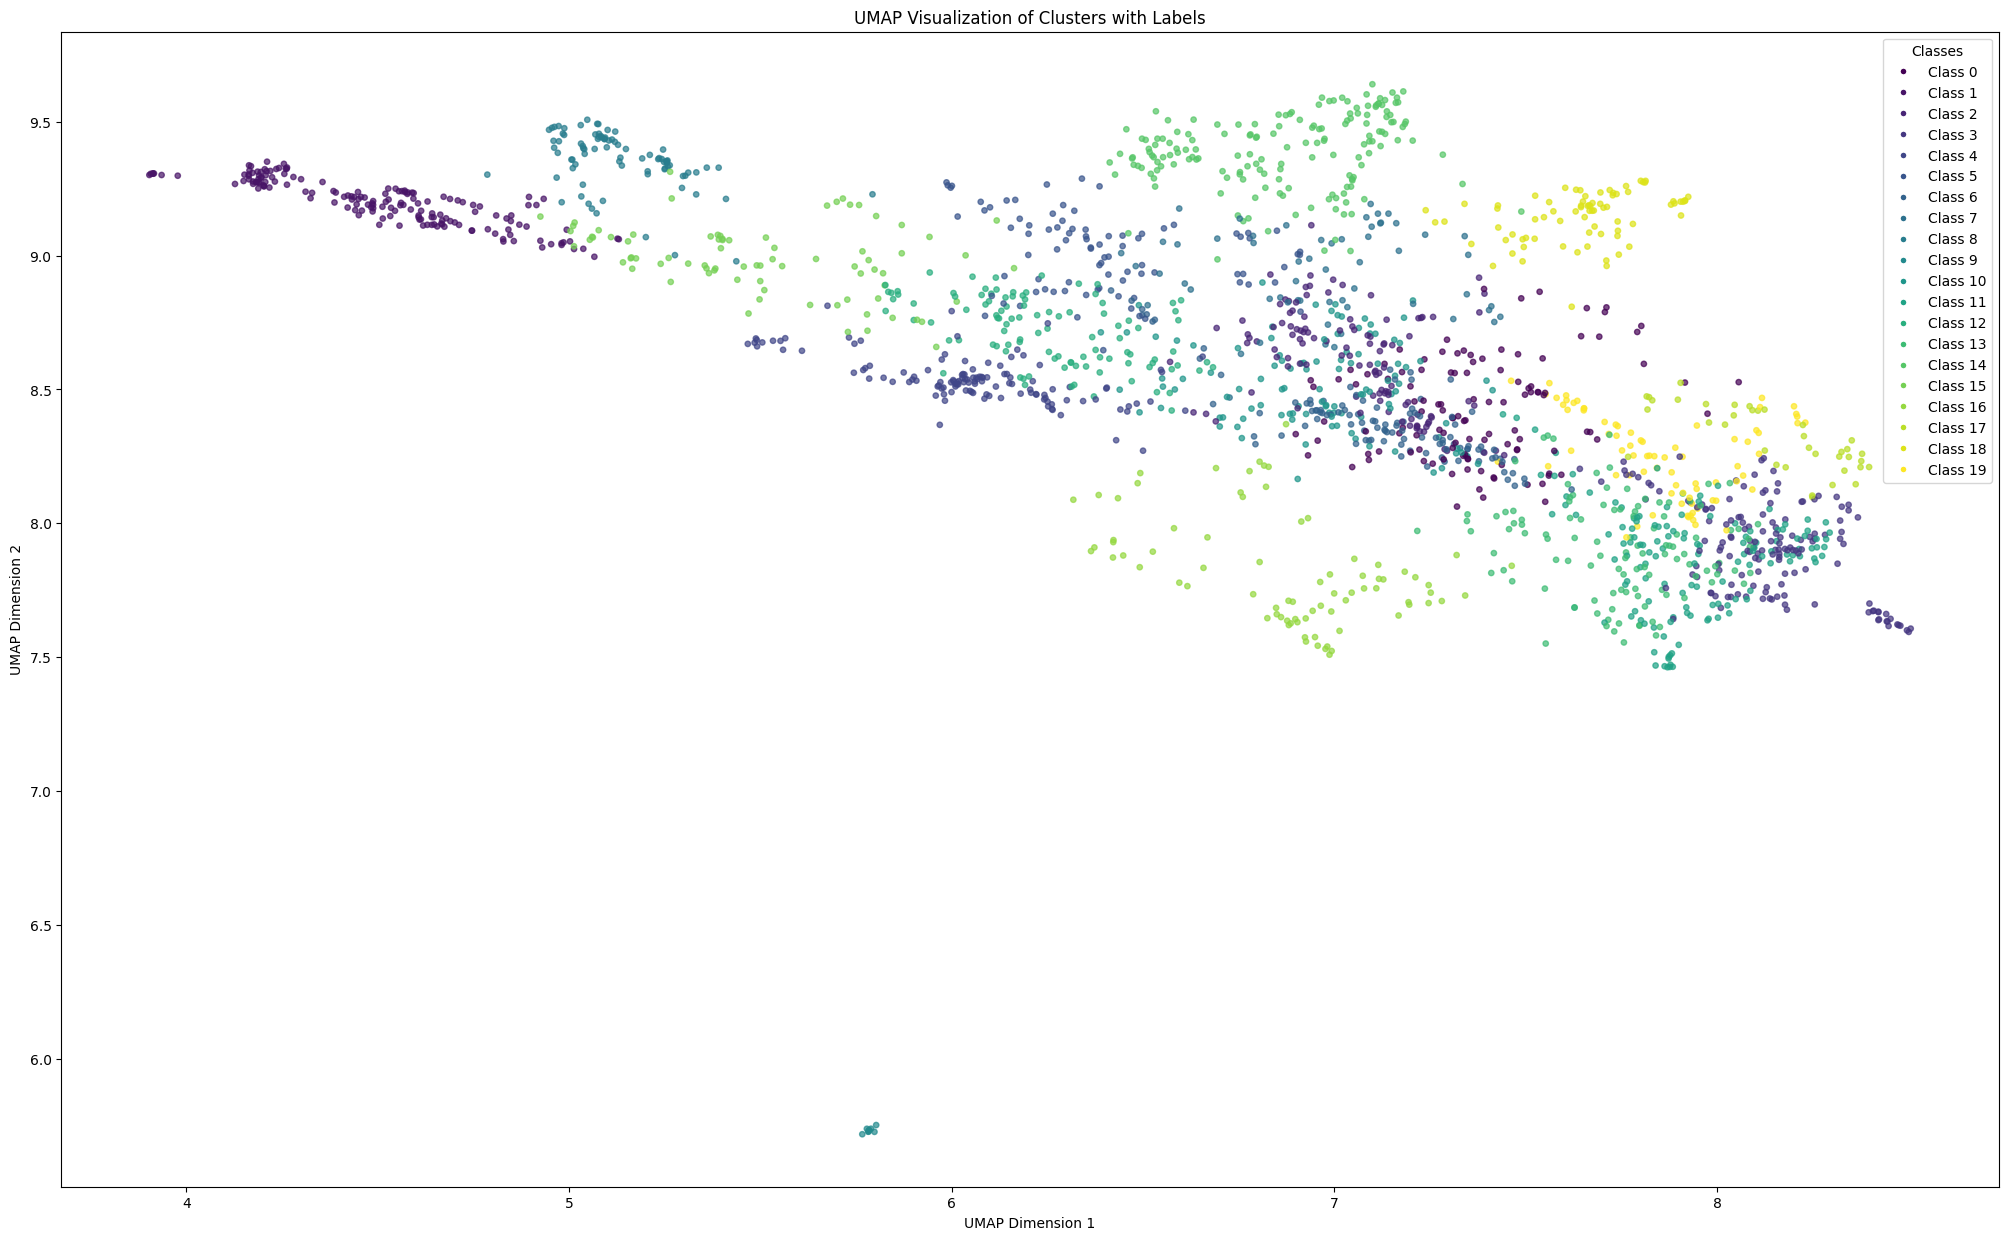

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Visualisation des clusters avec labels
plt.figure(figsize=(25, 15))
scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=pred_labels, cmap='viridis', alpha=0.7, s=15)
plt.title('UMAP Visualization of Clusters with Labels')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Ajout d'une légende pour les classes
legend_labels = np.unique(pred_labels)
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Class {label}', 
                             markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=5) for label in legend_labels]
plt.legend(handles=legend_handles, title='Classes')

plt.show()